#Supervised Fine-Tuning LLM

1. Create a JSONL file for Supervised Dataset

Example for Google AI Studio: Create a JSONL output of 25 lines for questions about AI, make the Output look like this format: {"messages": [{"role": "user", "content": "#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. Why are you here today?\n#Person2#: I found it would be a good idea to get a check-up.\n#Person1#: Yes, well, you haven't had one for 5 years. You should have one every year.\n#Person2#: I know. I figure as long as there is nothing wrong, why go see the doctor?\n#Person1#: Well, the best way to avoid serious illnesses is to find out about them early. So try to come at least once a year for your own good.\n#Person2#: Ok.\n#Person1#: Let me see here. Your eyes and ears look fine. Take a deep breath, please. Do you smoke, Mr. Smith?\n#Person2#: Yes.\n#Person1#: Smoking is the leading cause of lung cancer and heart disease, you know. You really should quit.\n#Person2#: I've tried hundreds of times, but I just can't seem to kick the habit.\n#Person1#: Well, we have classes and some medications that might help. I'll give you more information before you leave.\n#Person2#: Ok, thanks doctor.\n\nProvide a summary of the article in two or three sentences:\n\n"}, {"role": "model", "content": "Mr. Smith's getting a check-up, and Doctor Hawkins advises them to have one every year. Hawkins'll give some information about their classes and medications to help Mr. Smith quit smoking."}]}
{"messages": [{"role": "user", "content": "#Person1#: Hello Mrs. Parker, how have you been?\n#Person2#: Hello Dr. Peters. Just fine thank you. Ricky and I are here for his vaccines.\n#Person1#: Very well. Let's see, according to his vaccination record, Ricky has received his Polio, Tetanus and Hepatitis B shots. He is 14 months old, so he is due for Hepatitis A, Chickenpox and Measles shots.\n#Person2#: What about Rubella and Mumps?\n#Person1#: Well, I can only give him these for now, and after a couple of weeks I can administer the rest.\n#Person2#: OK, great. Doctor, I think I also may need a Tetanus booster. Last time I got it was maybe fifteen years ago!\n#Person1#: We will check our records and I'll have the nurse administer and the booster as well. Now, please hold Ricky's arm tight, this may sting a little.\n\nProvide a summary of the article in two or three sentences:\n\n"}, {"role": "model", "content": "Mrs Parker takes Ricky for their vaccines. Dr. Peters checks the record and then gives Ricky a vaccine."}]}

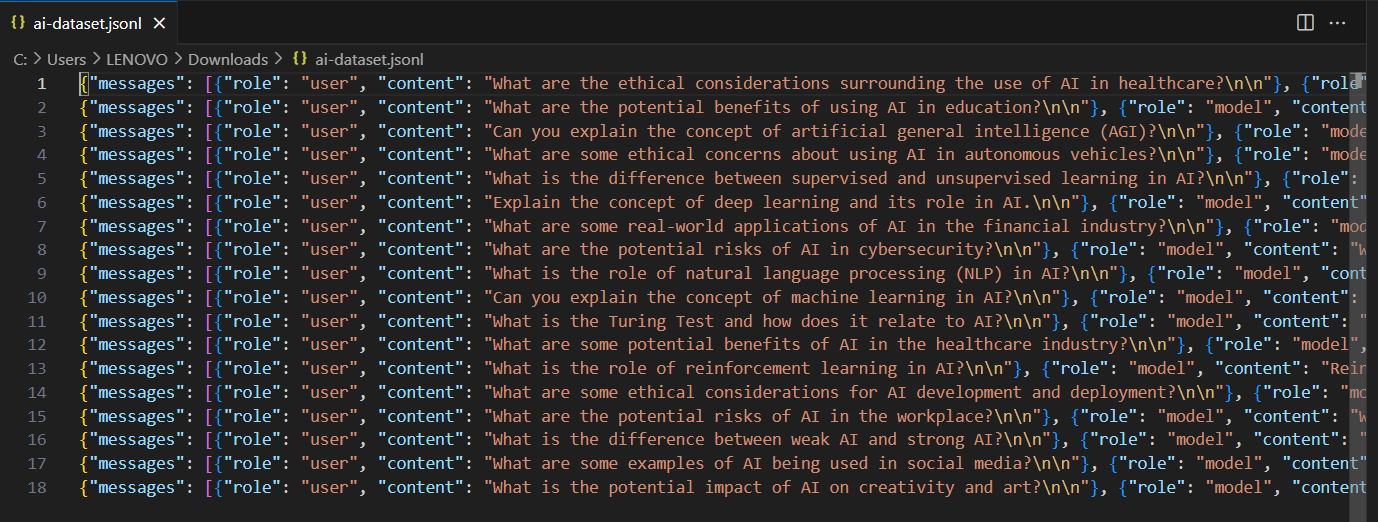

2. Create a Bucket

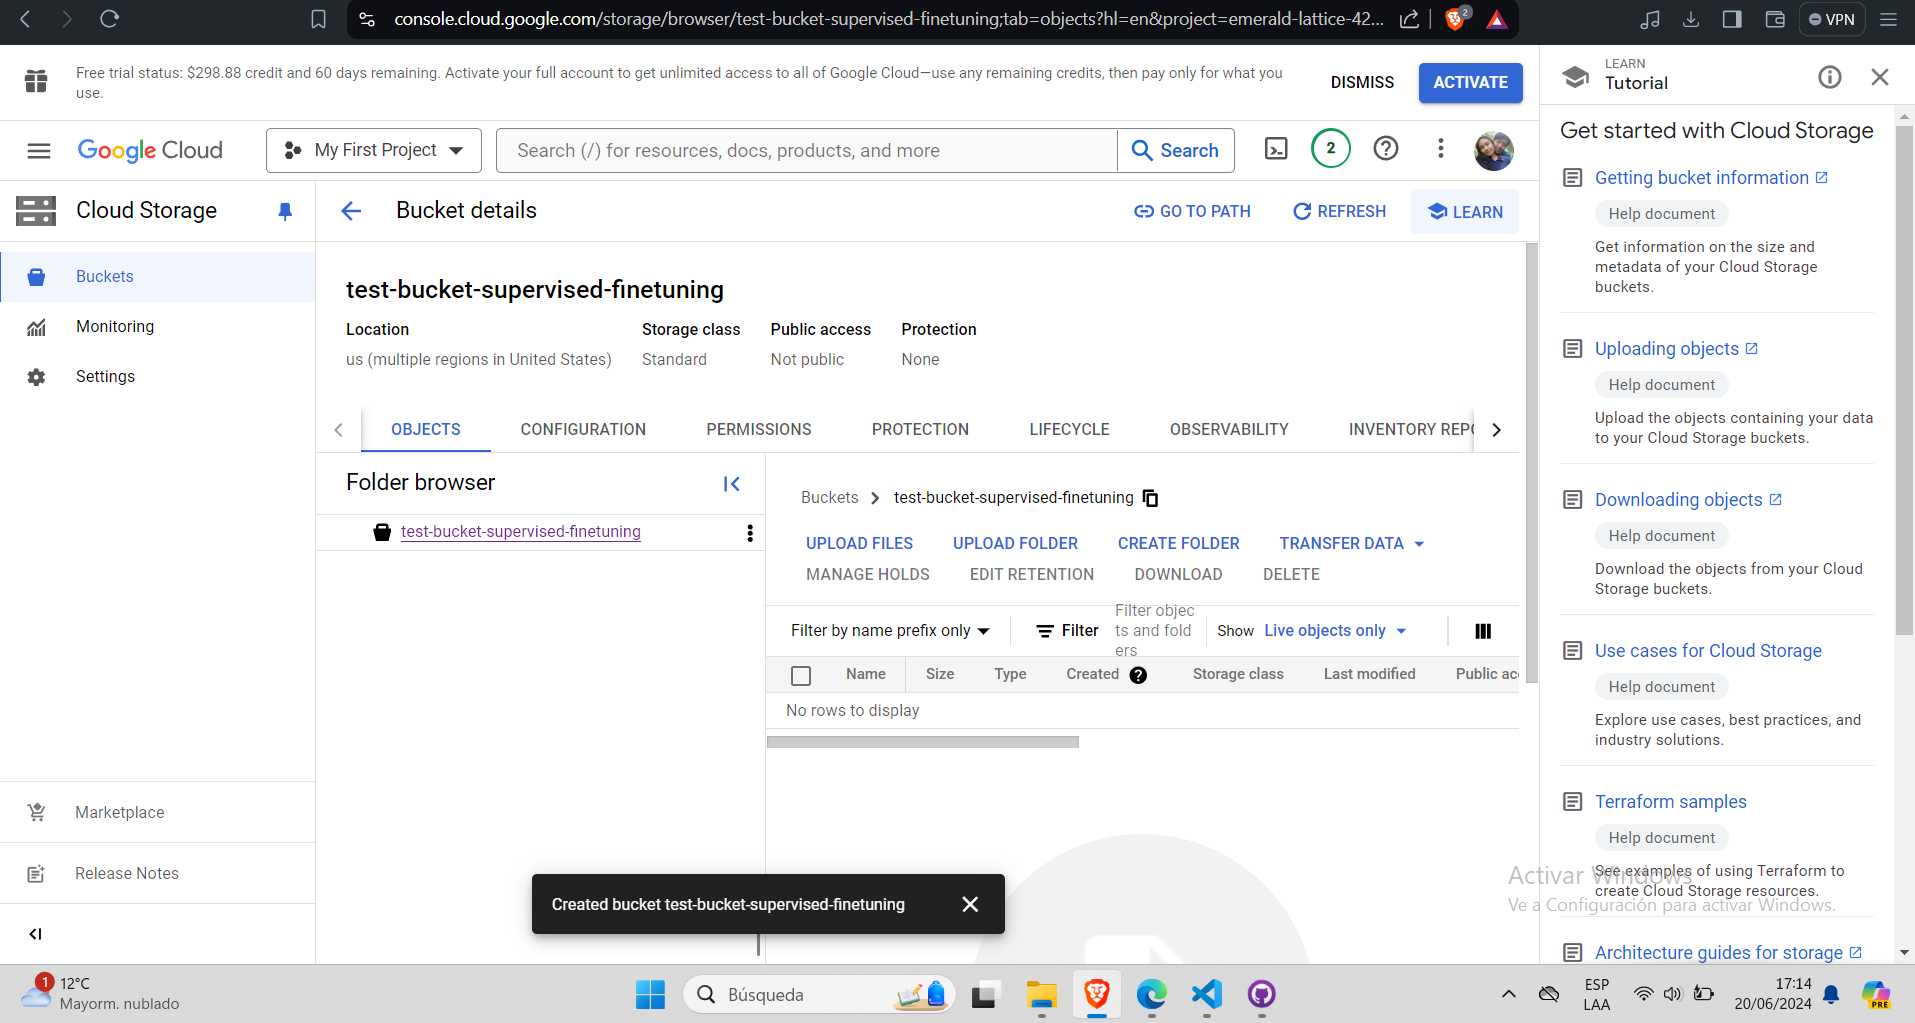

3. Create a tuned model

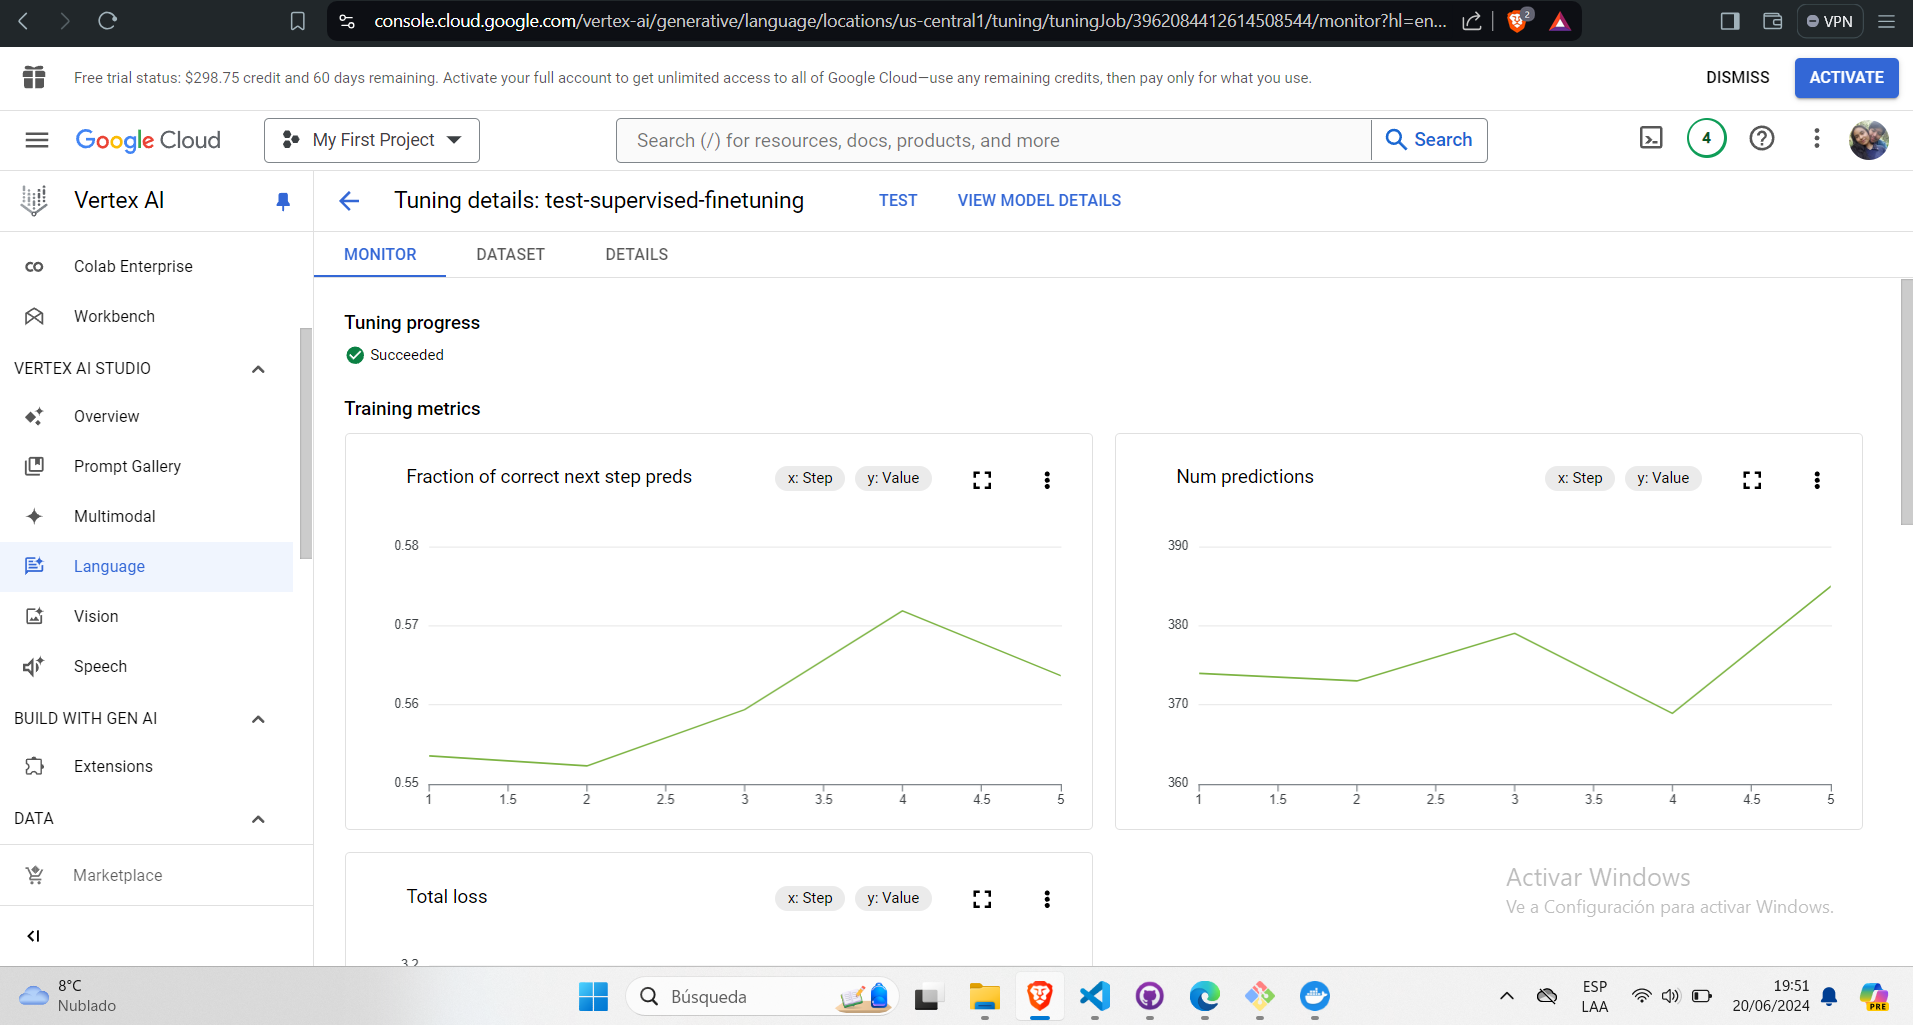

With: gemini-1-0-pro

In [2]:
!pip install --upgrade google-cloud-aiplatform

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 30.9 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-aiplatform
    Found existing installation: google-cloud-aiplatform 1.55.0
    Uninstalling google-cloud-aiplatform-1.55.0:
      Successfully uninstalled google-cloud-aiplatform-1.55.0


Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=U2EVdaKj8eZYPa22XJqeOrbkYJR4Vw&prompt=consent&token_usage=remote&access_type=offline&code_challenge=YTdx3NobBqtD4mwefVObJO7totSy8vnc2SZfXmlc8lk&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 

Command killed by keyboard interrupt

^C


In [1]:
!gcloud auth application-default login

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=6Xi1K0rIgWOhmulMpS6kBHcYqUNpMU&prompt=consent&token_usage=remote&access_type=offline&code_challenge=eK5sQ-CZ9_0J4we7UveT75-HUNAEM6ROr-Q1wUkX7WQ&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0ATx3LY6HfMblFw8MPCuwWsazBVKCuFVgt__iRnT2ewu2Kb2rESnjYUpAay_0EEUAuyhmCA

Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).
Ca

In [2]:
import base64
import vertexai
from vertexai.generative_models import GenerativeModel, Part, FinishReason
import vertexai.preview.generative_models as generative_models

def generate():
  vertexai.init(project="1077108483072", location="us-central1")
  model = GenerativeModel(
    "projects/1077108483072/locations/us-central1/endpoints/6009646883423649792",
  )
  responses = model.generate_content(
      ["""What is the importance of AI?"""],
      generation_config=generation_config,
      safety_settings=safety_settings,
      stream=True,
  )

  for response in responses:
    print(response.text, end="")


generation_config = {
    "max_output_tokens": 2048,
    "temperature": 1,
    "top_p": 1,
}

safety_settings = {
    generative_models.HarmCategory.HARM_CATEGORY_HATE_SPEECH: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    generative_models.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    generative_models.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    generative_models.HarmCategory.HARM_CATEGORY_HARASSMENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
}

generate()

/usr/local/lib/python3.10/dist-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


## Importance of AI:

**Overall, AI is important because it can:**

* **Automate tasks and processes:** This frees up humans to focus on more creative and strategic work.
* **Make better decisions:** AI can analyze vast amounts of data and identify patterns that humans might miss.
* **Improve efficiency and productivity:** AI can automate tasks that are time-consuming and repetitive.
* **Solve complex problems:** AI can be used to solve problems that are too complex for humans to solve on their own.
* **Create new products and services:** AI can be used to develop new products and services that are more efficient, effective, and innovative.
* **Improve safety and security:** AI can be used to identify and prevent potential risks.
* **Provide personalized experiences:** AI can be used to tailor products and services to individual users.
* **Boost economic growth:** AI is expected to be a major driver of economic growth in the coming years.


**Examples of AI applications with significan